Total test examples : 608
Total APIs          : 132
With 0 negatives, max result 83 full correct at checkpoint 6.813253012048197
With 1 negatives, max result 99 full correct at checkpoint 9.63581575548859
With 2 negatives, max result 110 full correct at checkpoint 4.634720229555236
With 5 negatives, max result 109 full correct at checkpoint 3.817653390742734


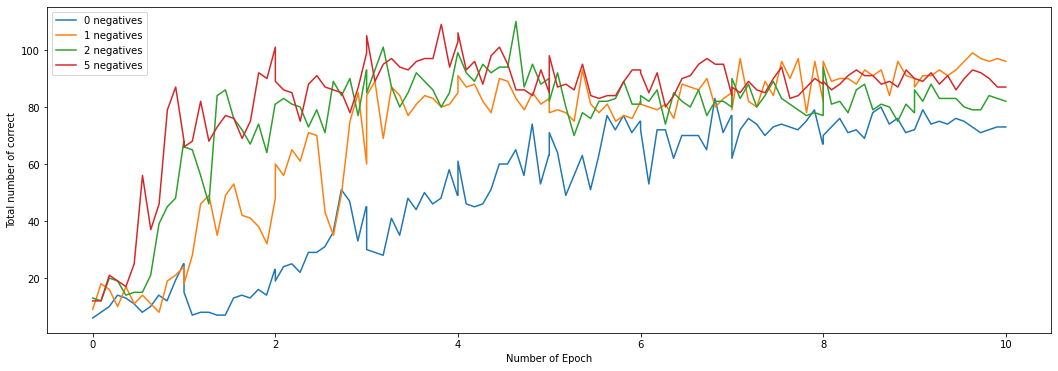

In [45]:
from matplotlib import pyplot as plt
import numpy as np
import math

fp = open("all_outputs.tsv")

results = {}
for line in fp:
    parts = line.strip().split("\t")
    num_neg, iter_count, num_correct = parts[:3]
    if num_neg not in results:
        results[num_neg] = []
    results[num_neg].append([float(iter_count), int(num_correct)])
    

def get_max_min(iter_nums):
    its = [float(x) - math.floor(x) for x in iter_nums]
    return max(its), min(its)
    pass

def convert_value(it, max_, min_):
    full = math.floor(it)
    it = float(it) - full
    return full + ((it - min_) / (max_ - min_))
    pass
    
    
for num_neg in results.keys():
    iters = [x[0] for x in results[num_neg]]
    max_iter, min_iter = get_max_min(iters)
#     print(max_iter, min_iter)
    for i in range(len(results[num_neg])):
        p = results[num_neg][i][0] 
        results[num_neg][i][0] = convert_value(p, max_iter, min_iter)


plt.figure(figsize=(18, 6))
print("Total test examples : 608")
print("Total APIs          : 132")

for k in ["0", "1", "2", "5", "8"]:
    if k in results:
        points = results[k]
        x = [p[0] for p in points]
        y = [p[1] for p in points]
        print(f"With {k} negatives, max result {max(y)} full correct at checkpoint {x[np.argmax(y)]}")
        plt.plot(x, y, label=f"{k} negatives")

plt.legend()
plt.xlabel("Number of Epoch")
plt.ylabel("Total number of correct")
plt.show()